In [1]:
#Importing the dataset
from keras.datasets import imdb 

The IMDB dataset is loaded into the notebook and the dataset is split into training and testing datasets separately as X_train, y_train, X_test, and y_test. The argument num_words = 6000 is used to keep the most frequently used 6000 words

In [2]:
# Creating training and test sets
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=6000)


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# Checking X_train values
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6,

In [4]:
# Checking y_train values
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
# Shape of train-test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

# **Building the LSTM model**

In [6]:
# Libraries for LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [7]:
# Fixing random seed for reproducibility
import numpy as np
np.random.seed(7)

The next step performed after providing a random seed is padding the sequence. Padding is performed to ensure all the sequences in the list have the same length. So X_train dataset and X_test dataset are padded to make the length of the dataset the same. Argument ( maxlen = 500) indicates the maximum length of the sequence. Any sequence longer than 500 will be truncated or stemmed.

In [8]:
# Truncating and padding input sequences
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

A sequential model is built consisting of three layers. The first layer added to the model is an Embedding layer, the second layer is an LSTM layer and the final layer is a Dense layer. The Embedding layer is defined as the first hidden layer of the network specifying three arguments: input_dim = 6000, output_dim= 32, input_length= 500. 

The second layer of the network is the LSTM layer which consists of 100 neurons. Each of the 100 neurons will act as a memory unit of the model and will produce output in 100 dimensions

The final layer added to the network is called the dense layer and it can be also called the output layer. A dense layer consists of a single neuron or a single output node. A sigmoid activation function is used in the dense layer since the target variable is discrete i.e 0 and 1.

In [9]:
# Model Building
model = Sequential()
model.add(Embedding(6000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Summary of the Model 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           192000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None


We have used binary cross-entropy as a loss function since this is a binary classification problem. Adam optimization is used and accuracy metrics are used to check the scores of the metrics.

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',
metrics=['accuracy'])

 The model is trained based on the training datasets for 3 epochs with a batch size of 64 and each epoch will have 391 instances to train the model. The number of epochs used in this model is comparatively less than that of other neural network models. The reason for training the model for 3 epochs is because of the smaller size of the dataset used, so higher epochs can possibly create overfitting of the model on such small data. 

In [12]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 129s 325ms/step - loss: 0.4614 - accuracy: 0.7913
Epoch 2/3
391/391 [==============================] - 122s 311ms/step - loss: 0.2785 - accuracy: 0.8907
Epoch 3/3
391/391 [==============================] - 121s 310ms/step - loss: 0.2399 - accuracy: 0.9076


# **Visualization of model performance**

Text(0.5, 1.0, 'Accuracy evolution')

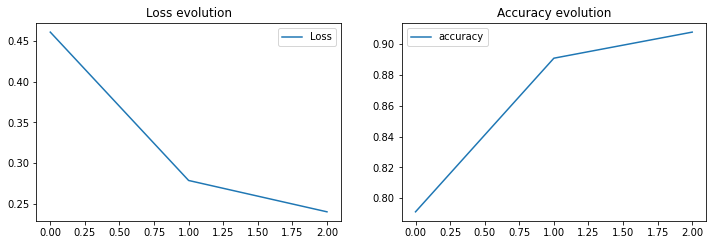

In [13]:
#Visualizing the training performance
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Accuracy evolution')

# **Evaluation of the model**

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.44%
